# Variational Autoencoder

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_14.npy")
samples = 60000
w=h=14
input_size = w*h
X_train = X_train[0:samples]
Xf = X_train.reshape(samples,input_size)
Xf = Xf/255.0

In [3]:
np.random.seed(42)

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def relu(x):
    x[x<0]=0
    return x

def diff_relu(x):
    res = x
    return res * (res > 1)

def tanha(x):
    return (2*sigm(2*x) - 1)

def diff_tanh(x):
    return (1 - tanha(x)**2)

def diff_SSE(y,x):
    return (2*(y-x))

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_layer_relu(prev_delta,out_prev,weights_prev):
    sn = (diff_relu(out_prev)*np.matmul(prev_delta,weights_prev.T))
    return sn

def backprop_layer_sigm(prev_delta,out_prev,weights_prev):
    sn = (diff_sigm(out_prev)*np.matmul(prev_delta,weights_prev.T))
    return sn

mean = 4

Wc = np.random.normal(0,0.5e-3,(input_size,mean))
Bc = np.random.normal(0,0.5e-3,(1,mean))

Wm = np.random.normal(0,0.5e-3,(input_size,mean))
Bm = np.random.normal(0,0.5e-3,(1,mean))

Wd = np.random.normal(0,0.5e-3,(mean,input_size))
Bd = np.random.normal(0,0.5e-3,(1,input_size))


2526875.0961769535 epoch =  0 batch = 119


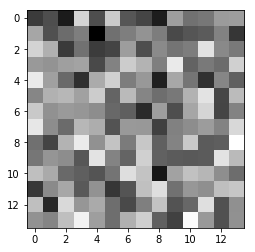

930352.2147216138 epoch =  1 batch = 119
1014009.5048776116 epoch =  2 batch = 119
1003809.7731076548 epoch =  3 batch = 119
1018395.1447945645 epoch =  4 batch = 119
994095.6388477032 epoch =  5 batch = 119
944166.07591173 epoch =  6 batch = 119
956205.3786856981 epoch =  7 batch = 119
936927.4325585653 epoch =  8 batch = 119
917538.1715794248 epoch =  9 batch = 119
942914.1691915675 epoch =  10 batch = 119
938142.8538402535 epoch =  11 batch = 119
945537.6538109315 epoch =  12 batch = 119
916257.1170010996 epoch =  13 batch = 119
929678.6998706008 epoch =  14 batch = 119
926913.7390938964 epoch =  15 batch = 119
955221.7852020835 epoch =  16 batch = 119
957143.128758752 epoch =  17 batch = 119
952391.4604351443 epoch =  18 batch = 119
945632.4424622846 epoch =  19 batch = 119
920581.9868134263 epoch =  20 batch = 119
939904.9204054796 epoch =  21 batch = 119
942357.0739910575 epoch =  22 batch = 119
981728.684278146 epoch =  23 batch = 119
943853.1688023993 epoch =  24 batch = 119
97

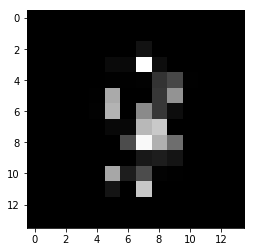

970084.8811670453 epoch =  51 batch = 119
978132.6492975308 epoch =  52 batch = 119
916571.5507412724 epoch =  53 batch = 119
951322.7340880291 epoch =  54 batch = 119
941153.0548258543 epoch =  55 batch = 119
926245.3976243485 epoch =  56 batch = 119
957560.7237822501 epoch =  57 batch = 119
974956.221541414 epoch =  58 batch = 119
915046.6733691943 epoch =  59 batch = 119
929123.4596217402 epoch =  60 batch = 119
933575.8939031964 epoch =  61 batch = 119
929057.7754374308 epoch =  62 batch = 119
963135.0684150617 epoch =  63 batch = 119
942704.4912525109 epoch =  64 batch = 119
933970.1160672545 epoch =  65 batch = 119
957497.046842938 epoch =  66 batch = 119
900537.9304105225 epoch =  67 batch = 119
956252.1128094003 epoch =  68 batch = 119
942587.3054067013 epoch =  69 batch = 119
944325.4439441637 epoch =  70 batch = 119
961212.6818803481 epoch =  71 batch = 119
931687.5861236289 epoch =  72 batch = 119
916421.4518713206 epoch =  73 batch = 119
940209.1212335565 epoch =  74 batch 

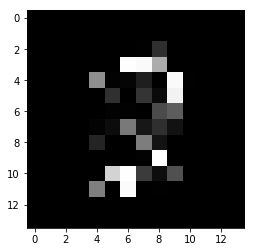

946934.2553985815 epoch =  101 batch = 119
936429.2527018125 epoch =  102 batch = 119
946844.3046626892 epoch =  103 batch = 119
942310.3845974343 epoch =  104 batch = 119
922795.3202546312 epoch =  105 batch = 119
942758.706157001 epoch =  106 batch = 119
925441.0780000896 epoch =  107 batch = 119
904835.4326655614 epoch =  108 batch = 119
921984.4208911732 epoch =  109 batch = 119
925972.0150737744 epoch =  110 batch = 119
920943.8592575841 epoch =  111 batch = 119
927743.4211937822 epoch =  112 batch = 119
909067.341245598 epoch =  113 batch = 119
931618.0925829734 epoch =  114 batch = 119
906639.2078079481 epoch =  115 batch = 119
961250.865595079 epoch =  116 batch = 119
920988.6404988396 epoch =  117 batch = 119
928588.0815901081 epoch =  118 batch = 119
906753.917323496 epoch =  119 batch = 119
924842.7293007461 epoch =  120 batch = 119
929561.4462982008 epoch =  121 batch = 119
911108.672566002 epoch =  122 batch = 119
920434.0906493521 epoch =  123 batch = 119
926600.169468093

In [3]:
lr = 1e-3
epochs = 150
batch_size = 500
number_of_batches = samples//batch_size
X_t = Xf

for i in range(epochs):
    wm = np.zeros(Wm.shape)
    bm = np.zeros(Bm.shape)
    wc = np.zeros(Wc.shape)
    bc = np.zeros(Bc.shape)
    wd = np.zeros(Wd.shape)
    bd = np.zeros(Bd.shape)
    loss = 0
    for j in range(number_of_batches):
        ## SHuffling data
        X = (X_t[j*batch_size:(j+1)*batch_size])
        indices = np.arange(len(X)).astype(int)
        np.random.shuffle(indices)
        X = X[indices]
        #forward pass
        outm = layer(X,Wm,Bm)
        mean  = relu(outm)
        outc = layer(X,Wc,Bc)
        log_covar = relu(outc)
        covar = np.exp(log_covar)
        gaus = np.random.normal(0,1,mean.shape)
        Z    = mean + (covar**0.5 *gaus)
        outy = layer(Z,Wd,Bd)
        Y    = sigm(outy)
        ### Backprop Encoder part
        ## Tanh activation, so directly writing derivatives
        dY = Y * (1-Y)
        # similarly, derivative of tanh = 1 - tanh**2
#         dmean = 1 - mean**2
#         dlog_covar = 1 - log_covar**2
        loss += np.linalg.norm(Y-X)**2 + 0.5*np.sum((covar - mean**2 -1 - log_covar))
        # y_delta.shape (N,d)
        y_delta = 2*(Y-X)*dY
        
        # Backprop decoder part 
        bd   += np.sum(y_delta,axis=0)
        wd   += np.matmul(Z.T,y_delta)
        # Backprop encoder part
        sct = 0.5*gaus*covar*np.matmul(y_delta,Wd.T)*diff_relu(log_covar)
        smt = np.matmul(y_delta,Wd.T)*diff_relu(mean)
        sm = smt + 2*(mean)*diff_relu(mean)
        sc = sct + 0.5*(covar**2 - 1)*diff_relu(log_covar) 
        #
        bm += np.sum(sm, axis=0).reshape(bm.shape)
        wm += np.matmul(X.T,sm)
        bc += np.sum(sc, axis=0).reshape(bc.shape)
        wc += np.matmul(X.T,sc)
        
    Wm -= lr*wm
    Bm -= lr*bm
    Wc -= lr*wc
    Bc -= lr*bc
    Bd -= lr*bd
    Wd -= lr*wd

    print(loss, "epoch = ", i, "batch =", j)
    if(i%50 == 0):
        img = Y[1].reshape(14,14)*255.0
        plt.imshow(img, cmap='gray')
        plt.show((14,14))

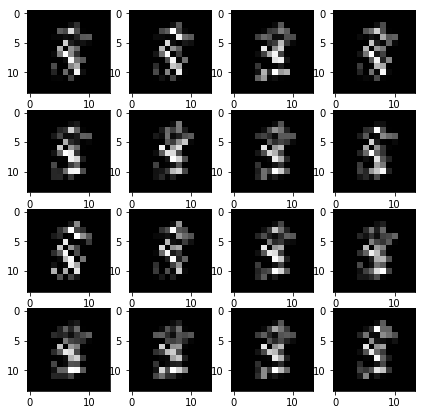

In [4]:
fig=plt.figure(figsize=(w/2,h/2))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    Z = np.random.normal(0,1,(Bc.shape))
    outy = layer(Z,Wd,Bd)
    y    = sigm(outy)
    img = y.reshape(w,h)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

Increasing the number if hidden nodes and increasing the complexity of the mean and covariance matrices can give better results

Currently the network is trying to generate 3 and 8s
But in one of the training runs, 2s were also generated

Just giving 1s as input generates beautiful images.

In [8]:
Y_test = np.load("train_labels.npy")

In [9]:
index = np.argwhere(Y_test==3)

In [10]:
X_1 = X_train[index]
X_1 = X_1.reshape(6131*2,196)

505832.8275401024 epoch =  0 batch = 244


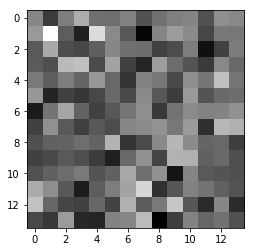

385039.8020525091 epoch =  1 batch = 244
302625.9810060967 epoch =  2 batch = 244
247631.391088454 epoch =  3 batch = 244
210453.44386788618 epoch =  4 batch = 244
184465.24914162763 epoch =  5 batch = 244
165697.37491425461 epoch =  6 batch = 244
151735.85670240124 epoch =  7 batch = 244
141068.97421207075 epoch =  8 batch = 244
132707.042353903 epoch =  9 batch = 244
126044.1760596045 epoch =  10 batch = 244
120619.39807337632 epoch =  11 batch = 244
116149.52080099838 epoch =  12 batch = 244
112409.59732731612 epoch =  13 batch = 244
109241.82297467339 epoch =  14 batch = 244
106543.052728564 epoch =  15 batch = 244
104199.16982949284 epoch =  16 batch = 244
102173.99773001552 epoch =  17 batch = 244
100383.34737661105 epoch =  18 batch = 244
98807.89912613662 epoch =  19 batch = 244
97410.89158893342 epoch =  20 batch = 244
96158.14602274084 epoch =  21 batch = 244
95035.24050512438 epoch =  22 batch = 244
94020.82593868616 epoch =  23 batch = 244
93100.38780483171 epoch =  24 batc

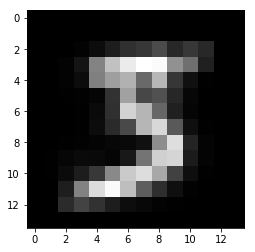

82865.4351226827 epoch =  51 batch = 244
82707.82483106249 epoch =  52 batch = 244
82558.2859152926 epoch =  53 batch = 244
82413.22976145009 epoch =  54 batch = 244
82273.01026678333 epoch =  55 batch = 244
82139.62788291948 epoch =  56 batch = 244
82013.59715629123 epoch =  57 batch = 244
81888.60995287752 epoch =  58 batch = 244
81772.43315532152 epoch =  59 batch = 244
81659.20856792775 epoch =  60 batch = 244
81548.0551078909 epoch =  61 batch = 244
81441.9032153972 epoch =  62 batch = 244
81340.27364250898 epoch =  63 batch = 244
81241.11432361424 epoch =  64 batch = 244
81146.79518430082 epoch =  65 batch = 244
81052.80040745961 epoch =  66 batch = 244
80967.37038477814 epoch =  67 batch = 244
80884.62111140747 epoch =  68 batch = 244
80794.58155475788 epoch =  69 batch = 244
80715.4422424377 epoch =  70 batch = 244
80637.94698378726 epoch =  71 batch = 244
80563.07144487933 epoch =  72 batch = 244
80490.21963220535 epoch =  73 batch = 244
80419.7061595016 epoch =  74 batch = 24

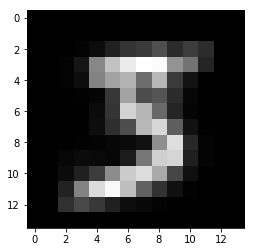

79074.09763081 epoch =  101 batch = 244
79042.01647613548 epoch =  102 batch = 244
79002.95655687433 epoch =  103 batch = 244
78971.53215256518 epoch =  104 batch = 244
78940.05293913129 epoch =  105 batch = 244
78906.0785055998 epoch =  106 batch = 244
78876.94532426087 epoch =  107 batch = 244
78842.64244110738 epoch =  108 batch = 244
78813.91269657647 epoch =  109 batch = 244
78783.04056426125 epoch =  110 batch = 244
78758.59625092677 epoch =  111 batch = 244
78728.4283973767 epoch =  112 batch = 244
78698.94806978156 epoch =  113 batch = 244
78672.59849175278 epoch =  114 batch = 244
78643.95529049265 epoch =  115 batch = 244
78622.04041964737 epoch =  116 batch = 244
78594.3235183933 epoch =  117 batch = 244
78568.94683453675 epoch =  118 batch = 244
78545.76504686152 epoch =  119 batch = 244
78517.60587099774 epoch =  120 batch = 244
78496.65206856673 epoch =  121 batch = 244
78471.73223777277 epoch =  122 batch = 244
78448.64258456275 epoch =  123 batch = 244
78425.70987344794

In [11]:
lr = 1e-4
epochs = 150
batch_size = 50
samples = 6131*2
number_of_batches = samples//batch_size
X_t = X_1/255.0

for i in range(epochs):
    wm = np.zeros(Wm.shape)
    bm = np.zeros(Bm.shape)
    wc = np.zeros(Wc.shape)
    bc = np.zeros(Bc.shape)
    wd = np.zeros(Wd.shape)
    bd = np.zeros(Bd.shape)
    loss = 0
    for j in range(number_of_batches):
        ## SHuffling data
        X = (X_t[j*batch_size:(j+1)*batch_size])
        indices = np.arange(len(X)).astype(int)
        np.random.shuffle(indices)
        X = X[indices]
        #forward pass
        outm = layer(X,Wm,Bm)
        mean  = relu(outm)
        outc = layer(X,Wc,Bc)
        log_covar = relu(outc)
        covar = np.exp(log_covar)
        gaus = np.random.normal(0,1,mean.shape)
        Z    = mean + (covar**0.5 *gaus)
        outy = layer(Z,Wd,Bd)
        Y    = sigm(outy)
        ### Backprop Encoder part
        ## Tanh activation, so directly writing derivatives
        dY = Y * (1-Y)
        # similarly, derivative of tanh = 1 - tanh**2
#         dmean = 1 - mean**2
#         dlog_covar = 1 - log_covar**2
        loss += np.linalg.norm(Y-X)**2 + 0.5*np.sum((covar - mean**2 -1 - log_covar))
        # y_delta.shape (N,d)
        y_delta = 2*(Y-X)*dY
        
        # Backprop decoder part 
        bd   += np.sum(y_delta,axis=0)
        wd   += np.matmul(Z.T,y_delta)
        # Backprop encoder part
        sct = 0.5*gaus*covar*np.matmul(y_delta,Wd.T)*diff_relu(log_covar)
        smt = np.matmul(y_delta,Wd.T)*diff_relu(mean)
        sm = smt + 2*(mean)*diff_relu(mean)
        sc = sct + 0.5*(covar**2 - 1)*diff_relu(log_covar) 
        #
        bm += np.sum(sm, axis=0).reshape(bm.shape)
        wm += np.matmul(X.T,sm)
        bc += np.sum(sc, axis=0).reshape(bc.shape)
        wc += np.matmul(X.T,sc)
        
    Wm -= lr*wm
    Bm -= lr*bm
    Wc -= lr*wc
    Bc -= lr*bc
    Bd -= lr*bd
    Wd -= lr*wd

    print(loss, "epoch = ", i, "batch =", j)
    if(i%50 == 0):
        img = Y[1].reshape(14,14)*255.0
        plt.imshow(img, cmap='gray')
        plt.show((14,14))

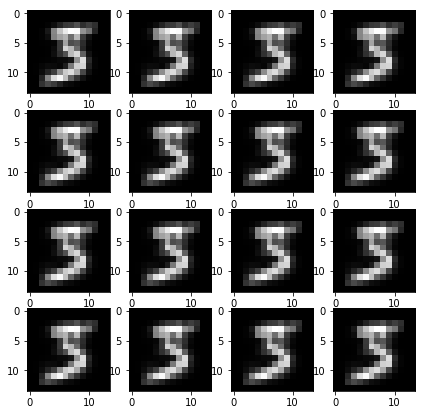

In [12]:
fig=plt.figure(figsize=(w/2,h/2))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    Z = np.random.normal(0,1,(Bc.shape))
    outy = layer(Z,Wd,Bd)
    y    = sigm(outy)
    img = y.reshape(w,h)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

As shown above, the network fits perfectly well on single modal data and generated them pretty faithfully